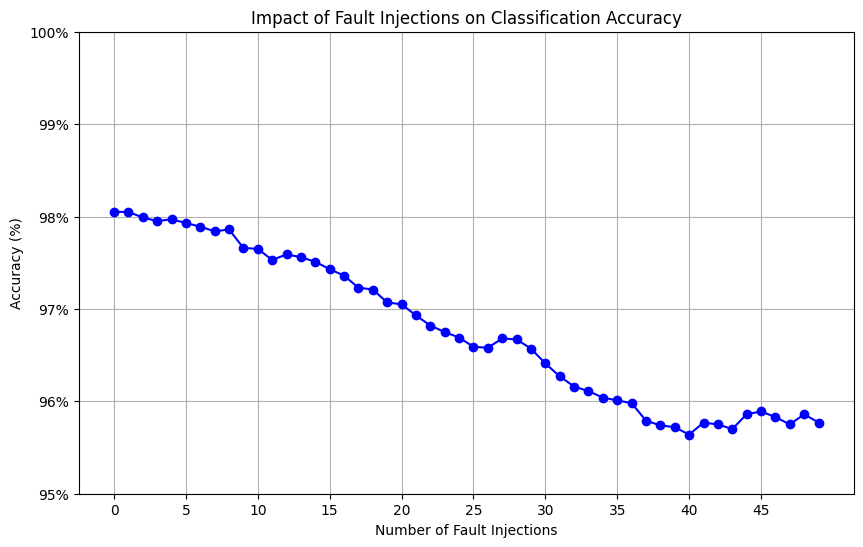

In [1]:

file = open('lenet_fault_injection_results.txt')

res = []

for line in file:
    line = line.strip()
    index, injections = int("".join(list(line)[:-51])), [int(x) for x in (list(line)[-51:])]
    res.append(injections)

file.close()

from tensorflow import keras

(_, _), (test_images, test_labels) = keras.datasets.mnist.load_data()

actual_res = test_labels[:10000]

inj_acc = []

for j in range(50):
    correct = 0
    for i in range(10000):
        if(res[i][j]==actual_res[i]):
            correct += 1
    inj_acc.append((correct/10000))

import matplotlib.pyplot as plt

import numpy as np

"""
Plot the accuracies for each fault injection level.
"""
injection_levels = np.arange(0, len(inj_acc))  # X-axis values (from 0 to 49)

plt.figure(figsize=(10, 6))
plt.plot(injection_levels, inj_acc, marker="o", linestyle="-", color="b")
plt.title("Impact of Fault Injections on Classification Accuracy")
plt.xlabel("Number of Fault Injections")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.xticks(np.arange(0, 50, step=5))  # X ticks every 5 injections

# Set y-axis to start at 0.9
plt.ylim(0.95, 1.0)
plt.yticks(np.arange(0.95, 1.00, step=0.01), [f'{x*100:.0f}%' for x in np.arange(0.95, 1.00, step=0.01)])  # Accuracy in percentages

plt.show()